In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('data/income_data_2017_clean_zeros.csv.bz2', compression='bz2', index_col='peridnum')

List of features to consider

In [3]:
features_list = ['peioocc','ern_val', 
                 'a_hga', 'H_NUMPER', 'MARSUPWT', 'FKIND', 'FPERSONS', 
                 'FOWNU6', 'FOWNU18', 'a_age', 'PRDTRACE', 'A_HRS1','A_CLSWKR', 'A_USLHRS',
                'A_WKSTAT', 'A_MJIND', 'MJOCC', 'PHMEMPRS', 'HRSWK', 'PTYN','LJCW',
                'WEMOCG', 'MIG_CBST', 'MIGSAME', 'HNUMFAM', 'H_TYPE', 'H_LIVQRT',
                'GTCBSA']
features_list = [str.lower(v) for v in features_list]

1. Filtering for individuals earning between \$5,000 and \$250,000 per year, 
2. Getting the features from the DataFrame, and dropping nan's

In [4]:
df2 = df[(df['ern_val'] > 5000) & (df['ern_val'] < 250000) &(df['a_hrs1'] >= 40)]
features_df = df2.loc[:,features_list]
features_df = features_df.dropna()

In [5]:
# Examining the dataset
features_df.describe()

,peioocc,ern_val,a_hga,h_numper,marsupwt,fkind,fpersons,fownu6,fownu18,a_age,...,hrswk,ptyn,ljcw,wemocg,mig_cbst,migsame,hnumfam,h_type,h_livqrt,gtcbsa
count,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,...,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000
mean,4255.948221,44751.055996,40.534397,3.245297,149886.521207,1.497295,2.969632,0.253518,0.872890,41.618097,...,43.817368,1.901427,1.793734,12.526094,0.136786,1.114591,1.221156,2.353660,1.173905,25981.964925
std,2724.140091,31299.604264,2.624424,1.518794,95214.698074,0.767943,1.514456,0.575517,1.100923,11.466519,...,8.432395,0.359212,1.519312,7.101677,0.420111,0.326286,0.554159,2.088132,0.842173,20357.669180
min,10.000000,5002.000000,31.000000,1.000000,9281.000000,1.000000,1.000000,0.000000,0.000000,18.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2040.000000,24000.000000,39.000000,2.000000,74393.000000,1.000000,2.000000,0.000000,0.000000,33.000000,...,40.000000,2.000000,1.000000,6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,10420.000000
50%,4600.000000,36000.000000,40.000000,3.000000,143691.000000,1.000000,3.000000,0.000000,0.000000,42.000000,...,40.000000,2.000000,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,27900.000000
75%,6200.000000,56000.000000,43.000000,4.000000,192011.000000,2.000000,4.000000,0.000000,2.000000,50.000000,...,45.000000,2.000000,2.000000,19.000000,0.000000,1.000000,1.000000,4.000000,1.000000,38900.000000
max,9750.000000,200000.000000,46.000000,15.000000,978808.000000,3.000000,15.000000,5.000000,9.000000,74.000000,...,99.000000,2.000000,6.000000,23.000000,4.000000,3.000000,11.000000,9.000000,12.000000,79600.000000


In [6]:
features_list.remove('ern_val')
X = features_df[features_list]
Y = ((features_df['ern_val'] > 40000).values)
ratio=sum(features_df['ern_val'] > 40000)/len(features_df['ern_val'])
print('True class to Flase class ratio = {:2.4f}'.format(ratio))

True class to Flase class ratio = 0.4248


Splitting Train/Test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=2)

Extracting sample weights from the data 

In [8]:
weights = X_train['marsupwt']
X_train = X_train.drop('marsupwt',axis=1)
X_test = X_test.drop('marsupwt', axis=1)

Trying a desicsion tree classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
_=model = DecisionTreeClassifier(max_depth=8)
_=model.fit(X_train, Y_train, sample_weight=weights)
print(model.score(X_test, Y_test))

0.751252996295


While the score is not terribly bad, the confusion matrix have lots of false neatives

In [10]:
import sklearn.metrics as met
Y_pred = model.predict(X_test)
print(met.confusion_matrix(Y_test,Y_pred, labels=[0,1]))
print(met.f1_score(Y_test,Y_pred))

[[4128 1075]
 [1208 2767]]
0.707944224127


Trying to gradient boosting classifier

In [11]:
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
seed = 2
num_trees = 300
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
_=model.fit(X_train, Y_train, sample_weight=weights)
print(model.score(X_test, Y_test))

0.776639790804


In [12]:
Y_pred = model.predict(X_test)
print(met.confusion_matrix(Y_test,Y_pred, labels=[0,1]))
print(met.f1_score(Y_test,Y_pred))

[[4292  911]
 [1139 2836]]
0.734524734525


In [13]:
Y_score = model.decision_function(X_test)
fpr, tpr, _ = met.roc_curve(Y_test, Y_score)

#### ROC and Learning curves

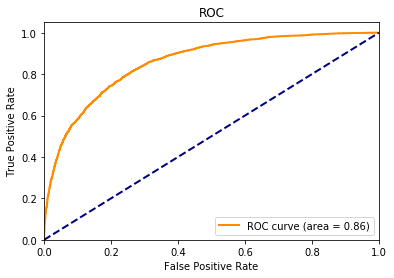

In [14]:
plt.figure()
lw = 2
auc = met.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {:0.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [15]:
from sklearn.model_selection import learning_curve

In [16]:
train_sizes, train_scores, test_scores = learning_curve(
        model, X, Y, n_jobs=2, train_sizes=np.linspace(.05, 1.0, 10))

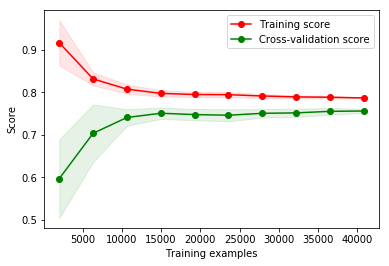

In [17]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show()

### Some more classifiers
Trying a begging classifier

In [18]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(n_estimators=num_trees, random_state=seed)
_=model.fit(X_train, Y_train, sample_weight=weights)
print(model.score(X_test, Y_test))

0.764109827849


In [19]:
Y_pred = model.predict(X_test)
print(met.confusion_matrix(Y_test,Y_pred, labels=[0,1]))
print(met.f1_score(Y_test,Y_pred))

[[4249  954]
 [1211 2764]]
0.71857532822


Finally, trying a simple naive Bayes  and logistic regression classifiers

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train,sample_weight=weights)
model.score(X_test, Y_test)

0.68620614512965783

In [21]:
Y_pred = model.predict(X_test)
met.confusion_matrix(Y_test,Y_pred, labels=[0,1])

array([[3466, 1737],
       [1143, 2832]])

Naive Bayes seems to get less false positives (though it's worse overall), so maybe some hybrid approch can improve the results

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
_=model.fit(X_train, Y_train, sample_weight=weights)
print(model.score(X_test, Y_test))

0.709631728045


In [23]:
Y_pred = model.predict(X_test)
met.confusion_matrix(Y_test,Y_pred, labels=[0,1])

array([[4241,  962],
       [1703, 2272]])

Suprisingly SVM is the worst of all

from sklearn.svm import SVC
model = SVC()
_=model.fit(X_train, Y_train, sample_weight=weights)
print(model.score(X_test, y_test))